In [1]:
from __future__ import annotations

In [2]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [3]:
import os
import datetime
import numpy as np
import sklearn.metrics
import tensorflow as tf
import sklearn.datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style('dark')
sns.set(rc={'figure.figsize': (10, 10), 'axes.grid': False})

In [4]:
rng = np.random.default_rng()
print(rng)

Generator(PCG64)


In [5]:
def plot_grid(X, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    imgs = X[rng.choice(np.arange(X.shape[0]), size=ax.shape)].reshape(*ax.shape, 28, 28)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [6]:
def show_fimg(x):
    matrix = x.reshape(28,28)
    plt.imshow(matrix, cmap='gray')

In [7]:
def plot_grid_and_label(X, y, model, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True, flatten_image=True, label_description=None):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    idx = rng.choice(np.arange(X.shape[0]), size=ax.shape)
    imgs, labels = X[idx], y[idx]
    inputs = imgs.reshape(-1, *imgs.shape[2:])
    
    if flatten_image:
        inputs = inputs.reshape(nrows * ncols, -1)
        
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])
        
    preds = np.argmax(tf.nn.softmax(model.predict(inputs)), axis=-1).reshape(nrows, ncols)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            ax[i, j].set_title(f'label: {map_label(labels[i, j])}, prediction: {map_label(preds[i, j])}')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [8]:
label_description = [
     'A',   'I',   'U',  'E',  'O',
    'KA',  'KI',  'KU', 'KE', 'KO',
    'SA', 'SHI',  'SU', 'SE', 'SO',
    'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA',  'NI',  'NU', 'NE', 'NO',
    'HA',  'HI',  'FU', 'HE', 'HO',
    'MA',  'MI',  'MU', 'ME', 'MO',
    'YA',         'YU',       'YO',
    'RA',  'RI',  'RU', 'RE', 'RO',
    'WA',  'II',        'EE', 'WO',
     'N',  'IT'
]

In [9]:
X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False, parser='auto')
y = np.array(list(map(int, y)))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
counts = { j: np.sum(y_train == i) for i, j in enumerate(label_description) }

In [13]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 14)
# X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)
#
# print(X_train_3)
# print(y_train_3)

# labels, frequencies = np.unique(y_train_3, return_counts=True)
# plt.figure(figsize=(10, 6))
# plt.bar(labels, frequencies)
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Class Label Distribution')
# plt.xticks(rotation=45)
# plt.show()

In [14]:
from sklearn.utils.class_weight import compute_class_weight

print(counts) # what to do with imbalanced classes?
# max = max(counts.values())
# class_weights = {i: max / counts[label] for i, label in enumerate(counts)}
# print(class_weights.values())

class_weights = compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(y_train),
    y = y_train
)
print(class_weights)
# Create a dictionary mapping class indices to class weights
class_weight_dict = dict(enumerate(class_weights))

{'A': 5287, 'I': 5263, 'U': 5231, 'E': 683, 'O': 5303, 'KA': 5221, 'KI': 5250, 'KU': 5271, 'KE': 4096, 'KO': 5260, 'SA': 5254, 'SHI': 5275, 'SU': 5252, 'SE': 3667, 'SO': 3393, 'TA': 5273, 'CHI': 2252, 'TSU': 5277, 'TE': 5241, 'TO': 5234, 'NA': 5326, 'NI': 5245, 'NU': 1793, 'NE': 2111, 'NO': 5262, 'HA': 5209, 'HI': 4435, 'FU': 5207, 'HE': 5159, 'HO': 1721, 'MA': 5190, 'MI': 2680, 'MU': 1453, 'ME': 2947, 'MO': 5231, 'YA': 5268, 'YU': 1405, 'YO': 5249, 'RA': 5237, 'RI': 5262, 'RU': 5253, 'RE': 5215, 'RO': 1860, 'WA': 2120, 'II': 374, 'EE': 333, 'WO': 5271, 'N': 5295, 'IT': 3090}
[ 0.78430343  0.78787996  0.79269972  6.07117459  0.78193706  0.79421801
  0.7898309   0.78668417  1.01235651  0.78832932  0.78922959  0.78608763
  0.78953013  1.13079145  1.22210794  0.78638579  1.84130206  0.7857897
  0.79118722  0.79224537  0.77856032  0.79058384  2.31266718  1.96428813
  0.78802969  0.79604766  0.93497458  0.79635342  0.80376279  2.40942025
  0.7989619   1.54724337  2.85382811  1.40706218  0.7

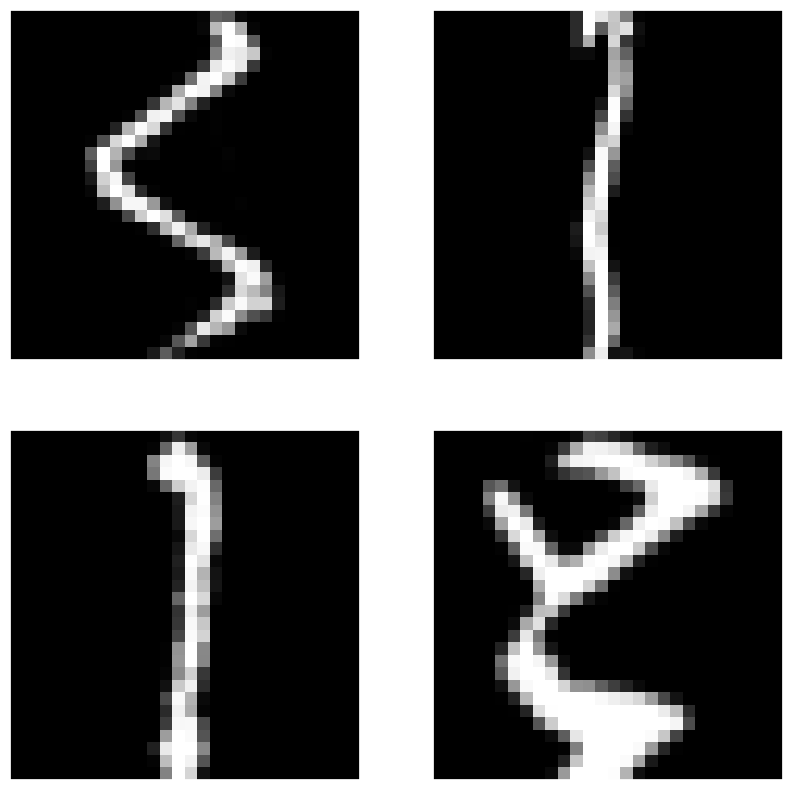

In [15]:
plot_grid(X_train)

## Flattened images
Use Dense layers

In [18]:
# create train and validation datasets, these datasets should use flattened images

x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

print(x_train[0])
# plt.imshow(X_train[0].reshape(28, 28), cmap='gray')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08282676 0.1257192
 0.00640921 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0719804  0.09958932 0.00345112 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00394413
 0.07888263 0.04880863 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04831

In [622]:
from keras import layers

# create model, this model should accept a flattened image
print(x_train.shape[1:])
model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=x_train.shape[1:]),

    layers.Dense(256, activation='relu'),
    layers.Dense(724, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),

    layers.Dense(49, activation='softmax')
])

# model.add(tf.keras.layers.Flatten())

(784,)


In [623]:
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 256)               200960    
                                                                 
 dense_385 (Dense)           (None, 724)               186068    
                                                                 
 dense_386 (Dense)           (None, 512)               371200    
                                                                 
 dense_387 (Dense)           (None, 256)               131328    
                                                                 
 dense_388 (Dense)           (None, 128)               32896     
                                                                 
 dense_389 (Dense)           (None, 49)                6321      
                                                                 
Total params: 928,773
Trainable params: 928,773
Non-t

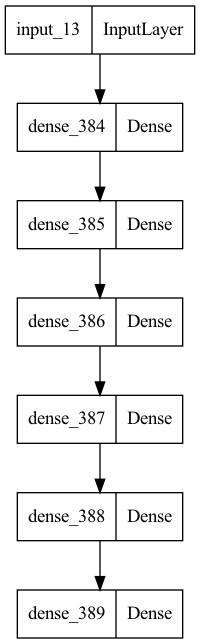

In [624]:
tf.keras.utils.plot_model(model)

In [625]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [626]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [627]:
# compile the model, make sure to add accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [640]:
# train the model, make sure to use callbacks and validation dataset
print(x_train.shape, y_train.shape)

# model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), class_weight=class_weight_dict)
model.fit(x_train, y_train, epochs=10, validation_split=0.3, class_weight=class_weight_dict)
model.evaluate(x_test, y_test)

(203184, 784) (203184,)
Epoch 1/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.1746 - accuracy: 0.9534 - val_loss: 0.4954 - val_accuracy: 0.8945
Epoch 2/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.1552 - accuracy: 0.9581 - val_loss: 0.5087 - val_accuracy: 0.8969
Epoch 3/10
4445/4445 [==============================] - 12s 3ms/step - loss: 0.1422 - accuracy: 0.9607 - val_loss: 0.5427 - val_accuracy: 0.8983
Epoch 4/10
4445/4445 [==============================] - 12s 3ms/step - loss: 0.1326 - accuracy: 0.9622 - val_loss: 0.5596 - val_accuracy: 0.8974
Epoch 5/10
4445/4445 [==============================] - 12s 3ms/step - loss: 0.1423 - accuracy: 0.9610 - val_loss: 0.6079 - val_accuracy: 0.8858
Epoch 6/10
2106/4445 [=============>................] - ETA: 5s - loss: 0.1267 - accuracy: 0.9655

KeyboardInterrupt: 

In [ ]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed
print(images.shape)

In [ ]:
plot_grid_and_label(images, y_test, model, label_description=label_description)

In [635]:
y_pred = model.predict(X_test) # make predictions'
y_pred_labels = np.argmax(y_pred, axis=1)  # select the class label with the highest probability

2117/2117 [==============================] - 2s 900us/step


(67728,)
(67728, 49)


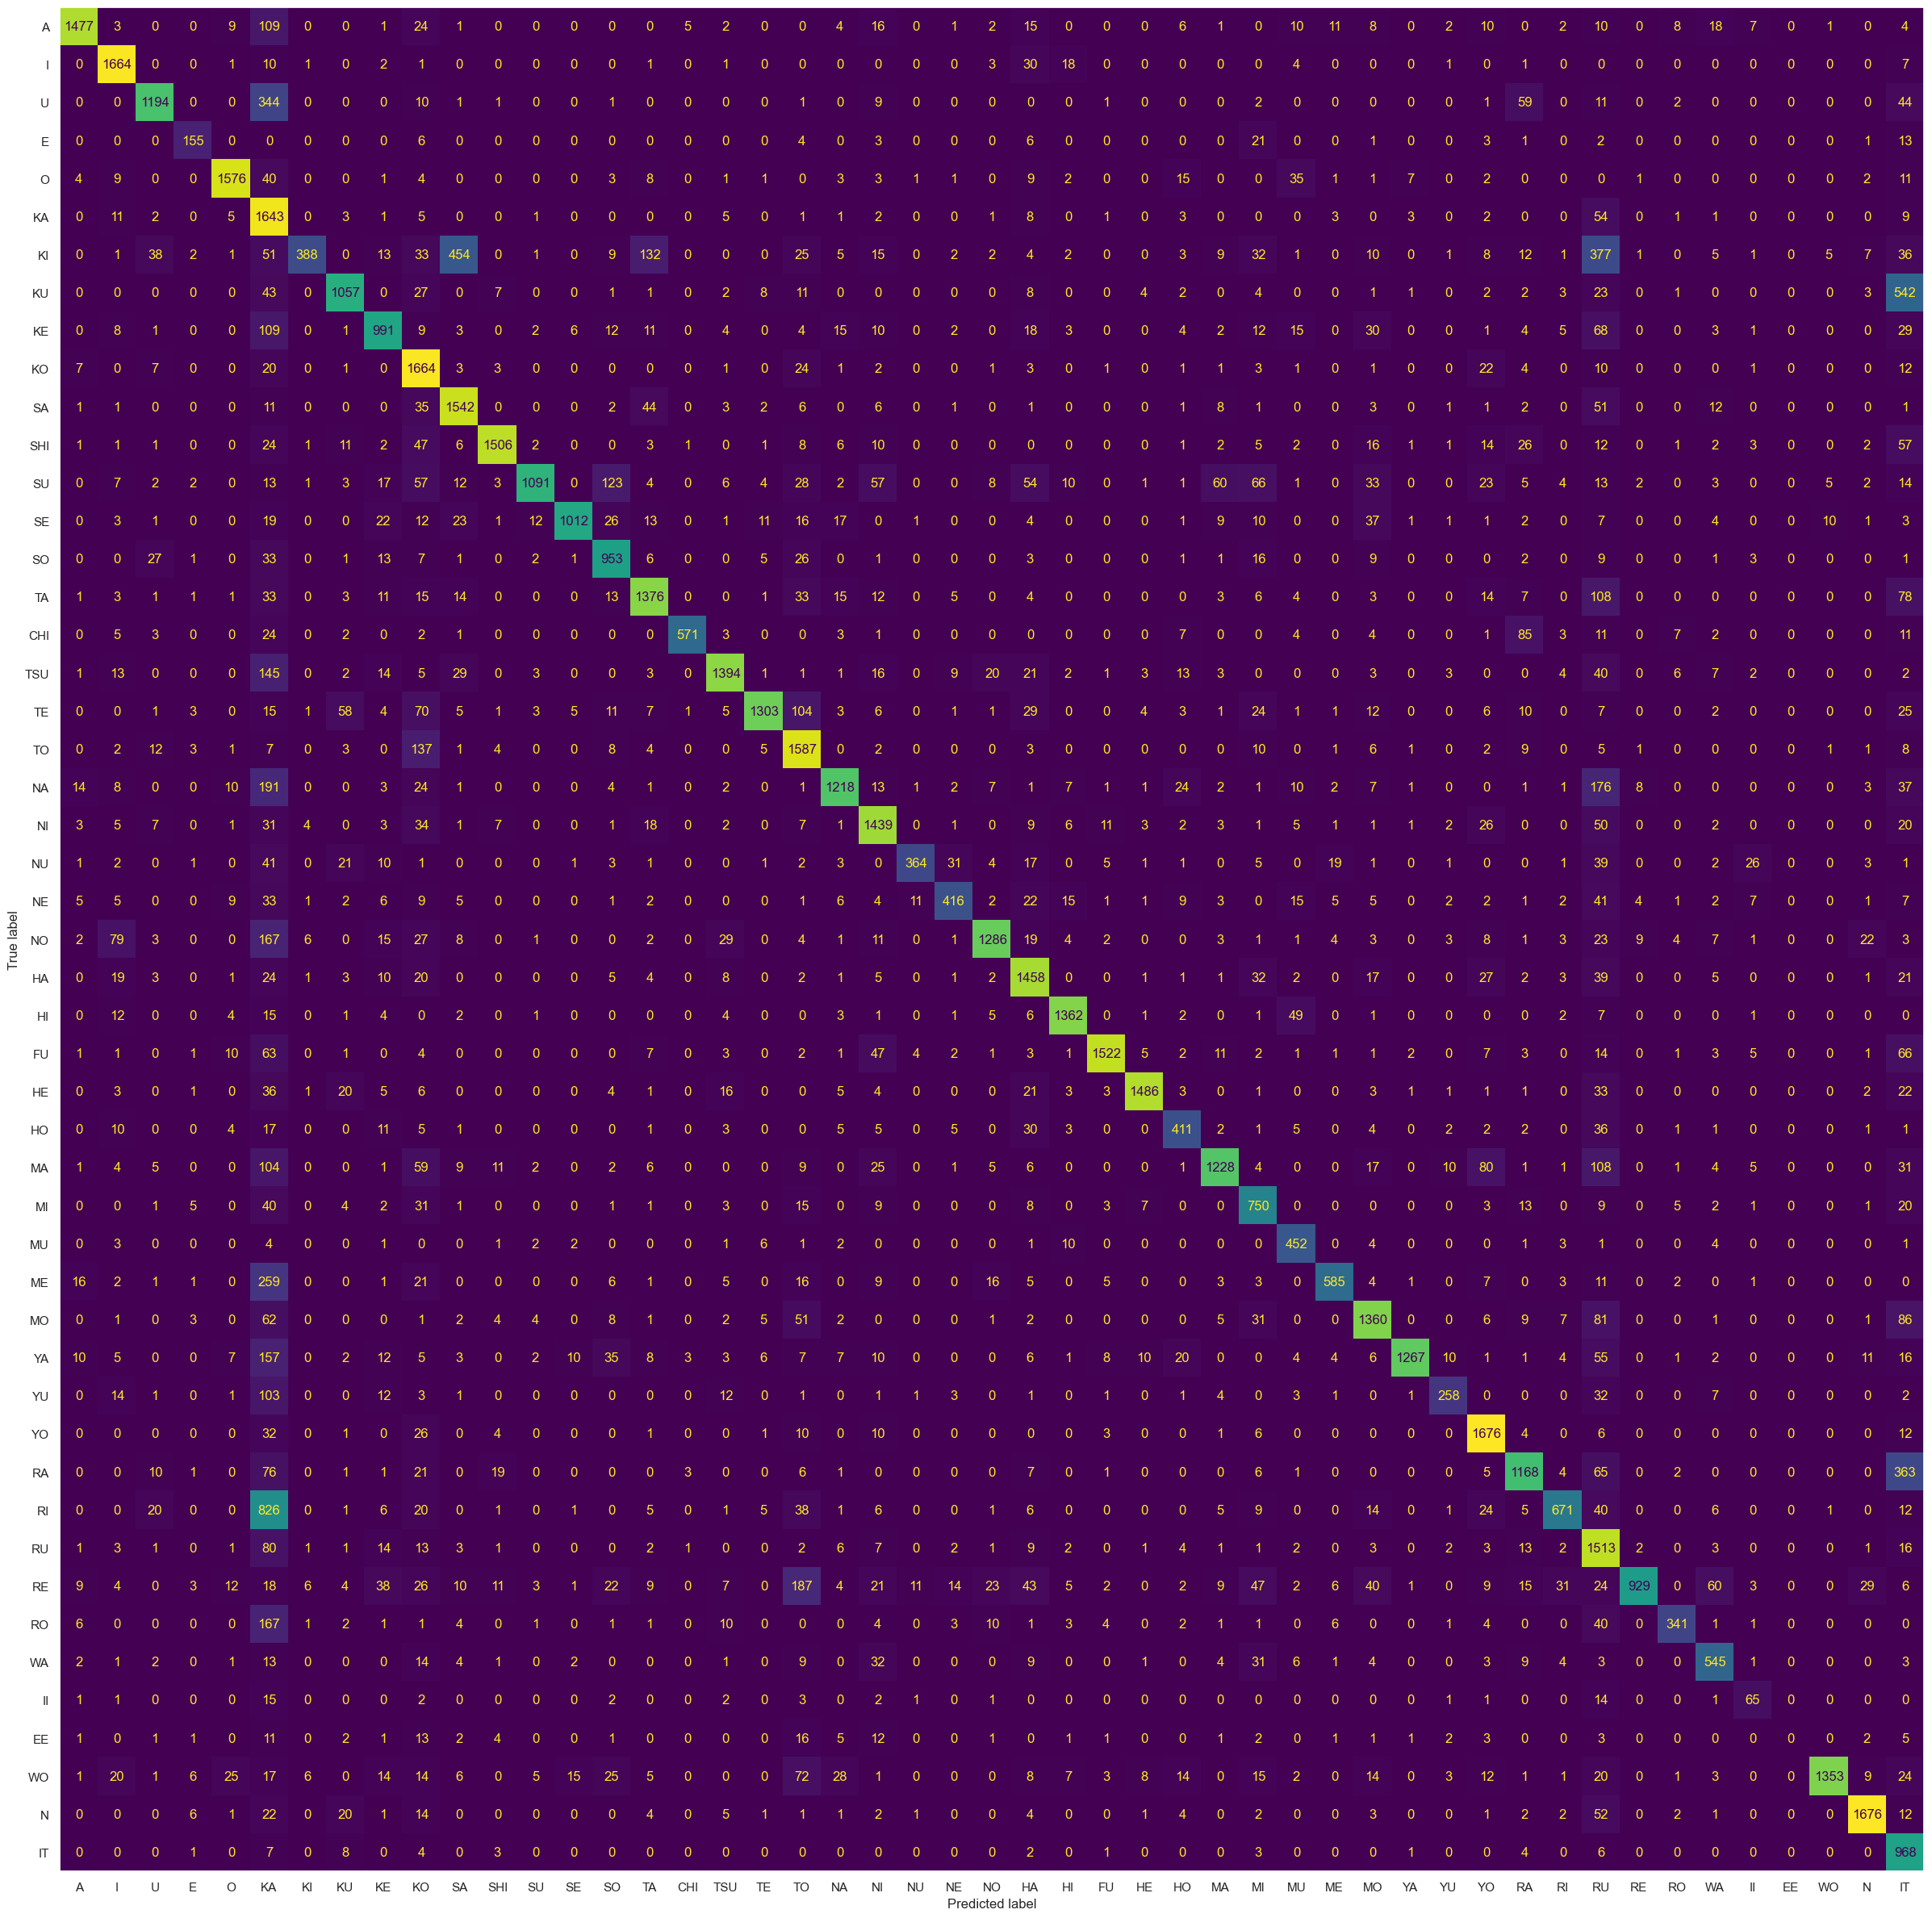

In [ ]:
_, ax = plt.subplots(figsize=(30, 30))
print(y_test.shape)
print(y_pred.shape)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_labels, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [639]:
accuracy = y_test == y_pred_labels
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.7391645813562203

## Actual images
Use Conv2D layers with Dense layer on top

In [642]:
# create train and validation datasets, these datasets should use 28x28x1 images
X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False, parser='auto')
y = np.array(list(map(int, y)))

X.shape

(270912, 784)

In [643]:
X = X.reshape(-1, 28, 28, 1)
X.shape
print(y.shape)
print(X.shape)
# plt.imshow(X[0])

X_train, X_test, y_train, y_test = train_test_split(X, y)

(270912,)
(270912, 28, 28, 1)


In [678]:
# create model, this model should accept a 28x28x1 image
from keras import layers

model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(49, activation='softmax')
])


In [679]:
model.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 3200)              0         
                                                                 
 dense_408 (Dense)           (None, 256)             

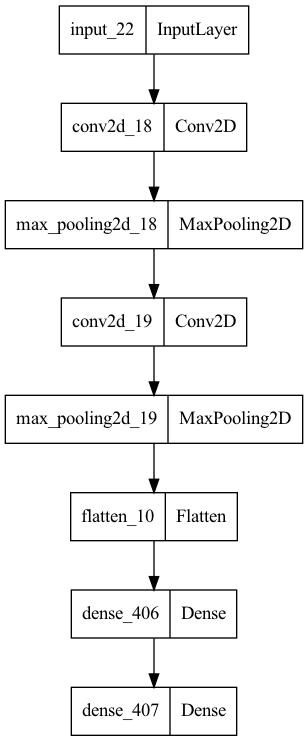

In [677]:
tf.keras.utils.plot_model(model)

In [666]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [667]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [668]:
# compile the model, make sure to add accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [669]:
# train the model, make sure to use callbacks and validation dataset
print(X_train.shape, y_train.shape)

model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.3, class_weight=class_weight_dict)
model.evaluate(X_test, y_test)

(203184, 28, 28, 1) (203184,)
Epoch 1/3
4445/4445 [==============================] - 42s 9ms/step - loss: 0.7391 - accuracy: 0.8211 - val_loss: 0.3595 - val_accuracy: 0.9009
Epoch 2/3
4445/4445 [==============================] - 41s 9ms/step - loss: 0.3064 - accuracy: 0.9120 - val_loss: 0.3080 - val_accuracy: 0.9150
Epoch 3/3
 145/4445 [..............................] - ETA: 34s - loss: 0.2048 - accuracy: 0.9394

KeyboardInterrupt: 

In [670]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed

1/1 [==============================] - 0s 27ms/step


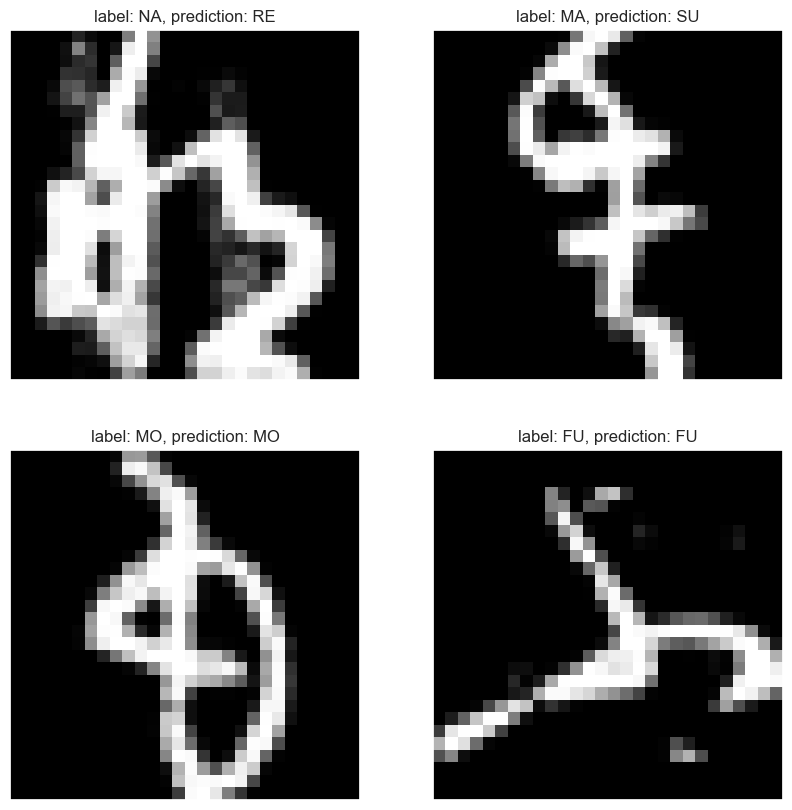

In [671]:
plot_grid_and_label(images, y_test, model, label_description=label_description, flatten_image=False)

In [672]:
y_pred = model.predict(X_test) # make predictions
y_pred_labels = np.argmax(y_pred, axis=1)  # select the class label with the highest probability

2117/2117 [==============================] - 6s 3ms/step


In [ ]:
_, ax = plt.subplots(figsize=(30, 30))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_labels, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [674]:
accuracy = y_test == y_pred_labels
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.908706978796655